In [ ]:
## AHRI Standard 340/360-2022-(I-P) - Table 6. Conditions for Standard Rating and Operating Tests
    # Cooling-Standard Rating Conditions Cooling 
    #    - Indoor Section - Air Entering: Dry bulb - 80F; Wet bulb - 67F
    #    - Outdoor Section - Condenser Type = Air Cooled/Evaporative: Dry bulb - 95F; Wet bulb - 75F

## ANSI/AHRI Standard 550/590-2023 (I-P) - Table 4. Standard Rating Conditions
    # All Cooling - Cooling Mode Evaporator - Air Entering: Dry bulb - 54F; Wet bulb - 44F (only this make sense to me)
    # 54F = 12.222C; 44F = 6.6667C

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
building_type = 'Hospital'
city = 'NewYork'
path = './chiller_data/ASHRAE901_' + building_type + '_STD2022_' + city + '.csv'
print(path)

./chiller_data/ASHRAE901_Hospital_STD2022_NewYork.csv


In [193]:
### all functions to use

def c_to_f(celsius):
    return celsius * 9/5 + 32


# Data Processing

In [214]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'hr_chiller_evap_temp_outlet', 'hr_chiller_mass_flow_rate','hr_chiller_evap_temp_inlet',
                 'chiller1_evap_temp_outlet', 'chiller1_mass_flow_rate','chiller1_evap_temp_inlet',
                 'chiller2_evap_temp_outlet', 'chiller2_mass_flow_rate','chiller2_evap_temp_inlet']
    selected_columns = [col for col in dfs[i].columns if col.endswith('let')]
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)

,Datetime,hr_chiller_evap_temp_outlet,hr_chiller_mass_flow_rate,hr_chiller_evap_temp_inlet,chiller1_evap_temp_outlet,chiller1_mass_flow_rate,chiller1_evap_temp_inlet,chiller2_evap_temp_outlet,chiller2_mass_flow_rate,chiller2_evap_temp_inlet
0,01/01 00:10:00,44.06,5.59,69.47,43.99,0.0,69.47,43.99,0.0,69.47
1,01/01 00:15:00,44.06,5.59,69.48,43.99,0.0,69.48,43.99,0.0,69.48
2,01/01 00:20:00,44.06,5.59,69.48,43.99,0.0,69.48,43.99,0.0,69.48
3,01/01 00:25:00,44.06,5.59,69.48,43.99,0.0,69.48,43.99,0.0,69.48
4,01/01 00:30:00,44.06,5.59,69.48,43.99,0.0,69.48,43.99,0.0,69.48
...,...,...,...,...,...,...,...,...,...,...
53857,12/31 23:40:00,44.06,5.59,69.68,43.90,0.0,69.68,43.90,0.0,69.68
53858,12/31 23:45:00,44.06,5.59,69.68,43.90,0.0,69.68,43.90,0.0,69.68
53859,12/31 23:50:00,44.06,5.59,69.68,43.90,0.0,69.68,43.90,0.0,69.68
53860,12/31 23:55:00,44.06,5.59,69.69,43.90,0.0,69.69,43.90,0.0,69.69


In [215]:
def bar_plot(df, col, filter_column, bins=20):
    # Plot a histogram with specified bins
    plt.hist(df[df[filter_col] != 0][col], bins=bins, edgecolor='black', alpha=0.7)

    # Add labels and title
    plt.title(col)
    plt.xlabel('temperatures')
    plt.ylabel('Frequency')

    # Show the chart
    plt.show()

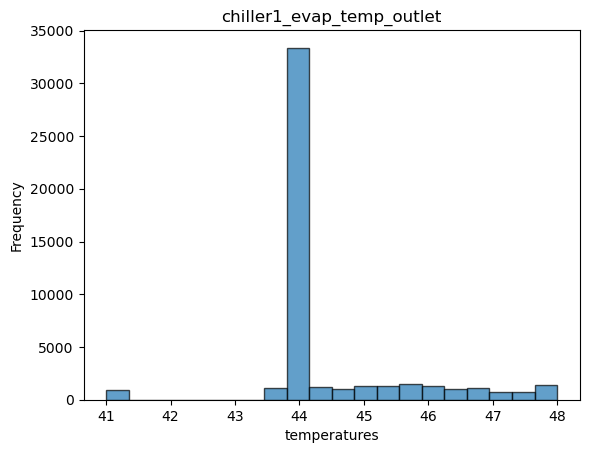

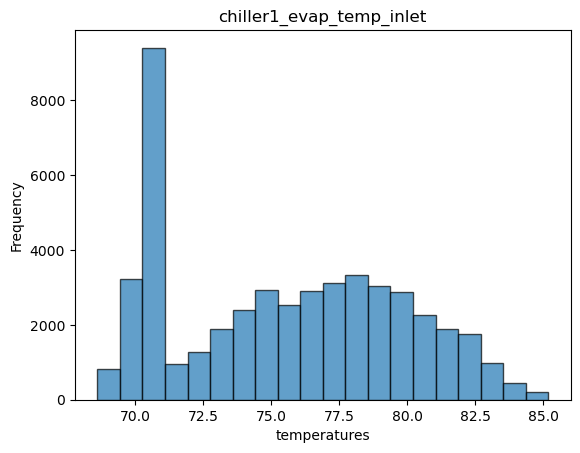

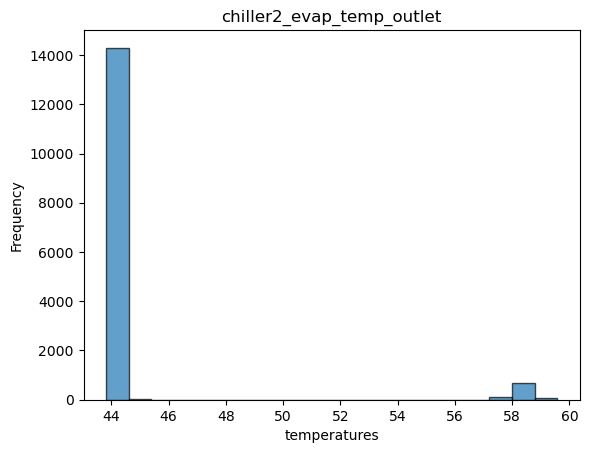

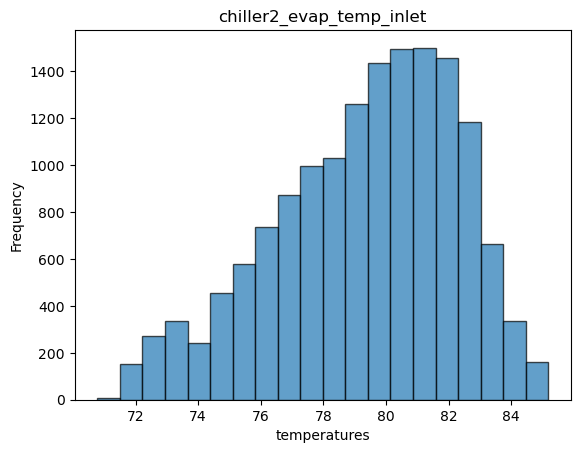

In [223]:
chillers = ['chiller1','chiller2']

for chiller in chillers:
    cols = [chiller+'_evap_temp_outlet', chiller+'_evap_temp_inlet']
    filter_col = chiller+'_mass_flow_rate'

    for col in cols:
        bar_plot(df, col, filter_col)


In [217]:
def draw_boxplot(df, col, filter_col, std = 0, site = ''):
    plt.boxplot(df[df[filter_col] != 0][col], vert=False, flierprops=dict(marker='o', markersize=6))
    if std != 0:
        plt.axvline(x=std, color='blue', linestyle='--', label='Threshold')
    # Add labels and title
    # plt.title('Boxplot: '+col)
    plt.xlabel('temperatures')
    plt.yticks([1], [site+col])
    # Add legend
    # plt.legend()

    # Show the chart
    plt.show()

In [226]:
chillers = ['chiller1','chiller2']

for chiller in chillers:
    cols = [chiller+'_evap_temp_outlet', chiller+'_evap_temp_inlet']
    std_temp = [6.7, 21]
    filter_col = chiller+'_mass_flow_rate'

    for i,col in enumerate(cols):
        draw_boxplot(df, col, filter_col, std=std_temp[i])

TypeError: draw_boxplot() missing 1 required positional argument: 'filter_col'

# Boxplots

In [219]:
chillers = ['chiller1','chiller2']
cols = []
filter_cols = []
for chiller in chillers:
    cols.append(chiller+'_evap_temp_outlet')
    cols.append(chiller+'_evap_temp_inlet')
    std_temp = [6.7, 21]
    filter_cols.append(chiller+'_mass_flow_rate')

In [220]:
def draw_boxplot(ax, df, col, filter_col, std = 0, site = ''):
    ax.boxplot(df[df[filter_col] != 0][col], vert=False, flierprops=dict(marker='o', markersize=6))
    if std != 0:
        ax.axvline(x=std, color='blue', linestyle='--', label='Threshold')
    # Add labels and title
    ax.set_title(site+' '+col)
    ax.set_xlabel('temperatures')
    ax.set_yticks([1])
    # ax.set_yticklabels([site+col])
    # Add legend
    # plt.legend()

    # Show the chart
    #plt.show()

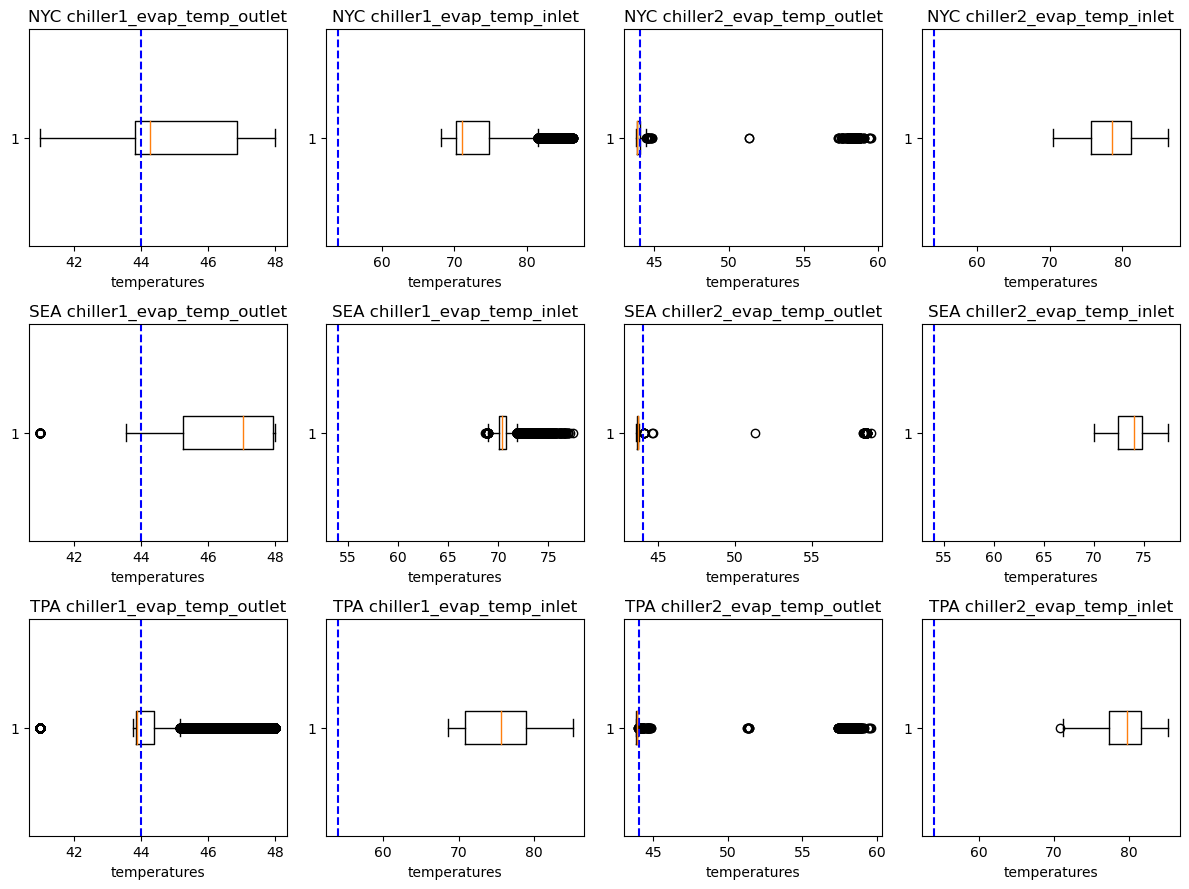

In [228]:
num_plots = len(chillers) * 2 * len(dfs)
num_cols = len(chillers) * 2
num_rows = len(dfs)
chillers = ['chiller1','chiller2']
sites = ['NYC','SEA','TPA']
std_temp = [44,54]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)

for i, df in enumerate(dfs):        
    for j, chiller in enumerate(chillers):
        cols = [chiller+'_evap_temp_outlet', chiller+'_evap_temp_inlet']
        filter_col = chiller+'_mass_flow_rate'
        for k, col in enumerate(cols):
            ax = axes[i, j * 2 + k]  # Adjust indexing to access the correct subplot
            draw_boxplot(ax, df, col, filter_col, site=sites[i], std = std_temp[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# Histogram

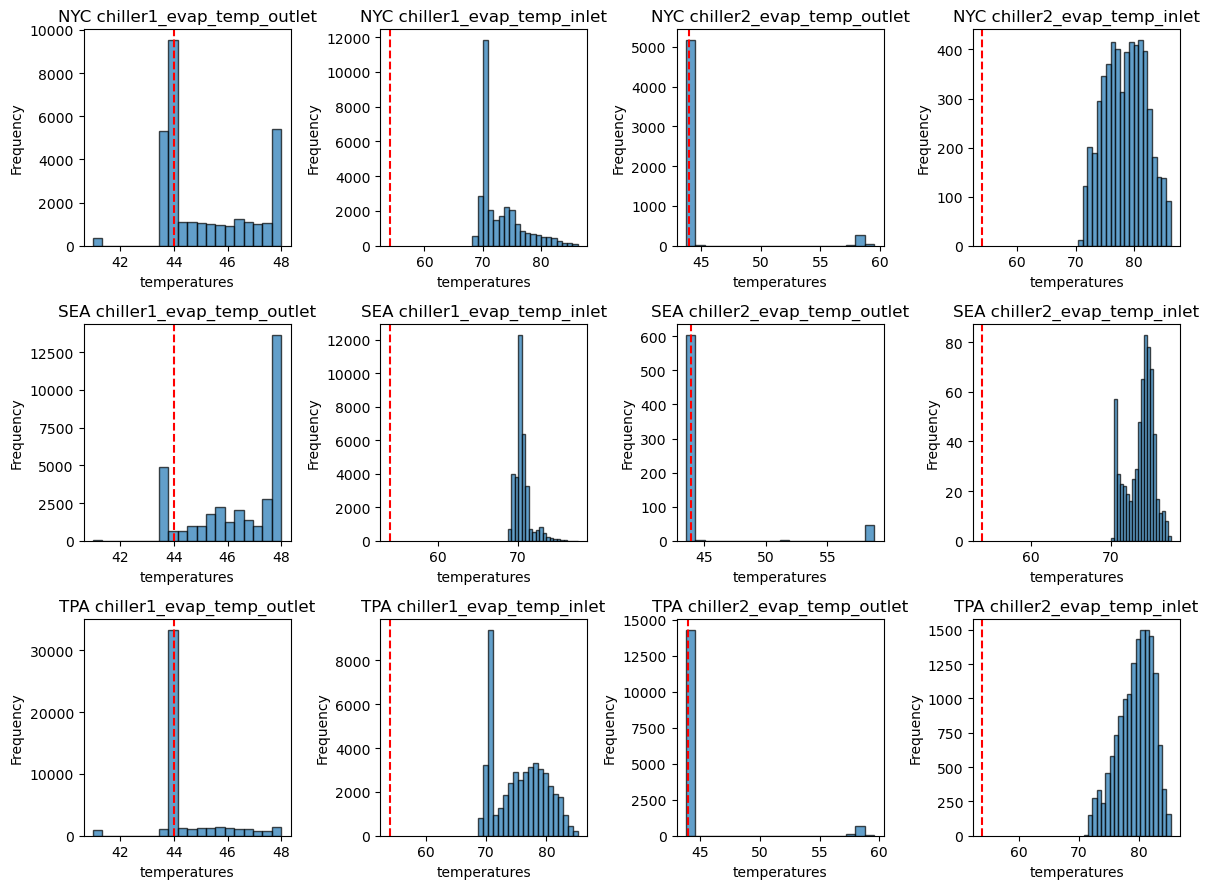

In [227]:
def draw_hist(ax, df, col, filter_col, bins = 20, site = '', std = 0):

    # Plot a histogram with specified bins
    ax.hist(df[df[filter_col] != 0][col], bins=bins, edgecolor='black', alpha=0.7)
    if std != 0:
        ax.axvline(x=std, color='red', linestyle='--', label='Threshold')
    # Add labels and title
    ax.set_title(site+' '+col)
    ax.set_xlabel('temperatures')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20
std_temp = [44,54]

for i, df in enumerate(dfs):        
    for j, chiller in enumerate(chillers):
        cols = [chiller+'_evap_temp_outlet', chiller+'_evap_temp_inlet']
        filter_col = chiller+'_mass_flow_rate'
        for k, col in enumerate(cols):
            ax = axes[i, j * 2 + k]  # Adjust indexing to access the correct subplot
            draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()